In [7]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/final_audio/data_set_fusion/expert1/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/final_audio/data_set_fusion/expert1/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/final_audio/data_set_fusion/expert1/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')\n"

In [10]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(207, 1653, 207, 1653, 207, 207)

In [11]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [12]:
len(x_audio_train_prediction),len(x_train_prediction)

(1860, 1860)

In [13]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [14]:
df_train=df_train.append(df_valid,ignore_index = True)

In [15]:
len(df_train)

1860

In [16]:
df_train

,labels
0,3
1,2
2,5
3,1
4,4
...,...
1855,1
1856,5
1857,4
1858,5


In [17]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [18]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,9.868231e-01,0.003875,0.000017,0.008416,0.000144,0.000724,9.999895e-01,1.943254e-09,3.874030e-14,1.661305e-08,1.350210e-07,1.036642e-05
1,4.480442e-05,0.002354,0.000122,0.969830,0.001741,0.025908,4.609876e-09,1.058811e-09,2.108981e-09,7.488494e-01,5.589756e-07,2.511501e-01
2,3.244231e-07,0.000087,0.999900,0.000006,0.000001,0.000006,7.721853e-06,1.307011e-06,8.536524e-01,1.188563e-03,2.653863e-04,1.448845e-01
3,7.267597e-05,0.000142,0.000079,0.107955,0.000029,0.891723,1.743934e-02,9.820557e-04,6.650287e-03,6.928495e-02,1.146925e-02,8.941740e-01
4,5.066096e-04,0.001949,0.000253,0.029472,0.000321,0.967497,2.913451e-07,1.317156e-01,6.436100e-05,8.377543e-01,5.032727e-06,3.046048e-02
...,...,...,...,...,...,...,...,...,...,...,...,...
202,5.786679e-05,0.000258,0.000029,0.000694,0.004409,0.994552,3.011852e-08,3.308199e-09,4.849932e-05,2.195966e-04,5.819585e-03,9.939123e-01
203,1.949344e-07,0.000052,0.999928,0.000009,0.000001,0.000009,6.629297e-09,4.512537e-08,9.959085e-01,9.253233e-07,4.090046e-03,4.614144e-07
204,1.627866e-03,0.004693,0.000329,0.004044,0.831949,0.157358,4.349038e-04,5.632761e-05,1.647181e-02,9.186048e-03,9.645699e-01,9.280946e-03
205,4.316892e-05,0.000232,0.000092,0.003479,0.823165,0.172989,3.169973e-10,8.959618e-08,3.770728e-06,9.074619e-09,9.989550e-01,1.041152e-03


In [19]:
len(x_test),len(x_train)

(207, 1860)

In [20]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,3.139591e-05,0.000790,0.000003,0.998874,0.000018,0.000285,4.537499e-04,2.186385e-03,1.921270e-02,9.781222e-01,1.616703e-05,8.820393e-06
1,1.103409e-07,0.000032,0.999933,0.000022,0.000001,0.000011,6.513397e-05,4.031113e-03,9.932030e-01,1.059530e-04,1.171815e-04,2.477502e-03
2,7.565987e-03,0.003240,0.000197,0.093270,0.000536,0.895191,8.289167e-11,2.243380e-13,2.174509e-12,2.728343e-03,1.528476e-05,9.972563e-01
3,9.221826e-04,0.972584,0.026023,0.000381,0.000035,0.000054,1.693225e-04,9.994117e-01,7.083039e-05,3.478866e-04,3.347439e-08,1.574630e-07
4,1.234611e-04,0.000554,0.000002,0.003309,0.995933,0.000079,1.028812e-08,1.459955e-11,5.230266e-05,6.553133e-07,9.998713e-01,7.583751e-05
...,...,...,...,...,...,...,...,...,...,...,...,...
1855,2.386935e-03,0.992171,0.004256,0.001075,0.000007,0.000105,1.874193e-11,9.999986e-01,1.378440e-06,6.596931e-08,2.597924e-11,5.920534e-13
1856,9.088054e-02,0.003614,0.000219,0.675536,0.000492,0.229259,1.895219e-04,5.131278e-06,3.377298e-03,2.157966e-03,1.551926e-06,9.942685e-01
1857,6.606330e-06,0.000776,0.000345,0.000146,0.992820,0.005906,2.098486e-08,9.905566e-10,3.027236e-03,3.572612e-06,9.928765e-01,4.092691e-03
1858,9.965926e-05,0.000174,0.000029,0.001711,0.000860,0.997127,2.520962e-05,6.674693e-08,2.527978e-08,3.137696e-03,1.635702e-06,9.968354e-01


In [21]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [22]:
len(new_y_train)

1860

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

In [24]:
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape

(array([3, 2, 5, ..., 4, 5, 4]), (1860,))

# training machine learning

In [25]:
from sklearn.svm import SVC
model = SVC(random_state=seed, kernel='linear')
svm=model.fit(x_train,y_train)
predictions = model.predict(x_test)
#print("Restored model, accuracy: {:5.2f}%".format(100*acc))

In [26]:
predictions

array([0, 3, 2, 5, 5, 2, 5, 1, 4, 0, 3, 1, 4, 0, 4, 5, 4, 1, 1, 1, 5, 2,
       0, 2, 1, 5, 3, 5, 5, 5, 5, 4, 5, 0, 2, 2, 4, 1, 5, 4, 2, 2, 1, 5,
       2, 1, 5, 5, 4, 3, 4, 2, 1, 3, 3, 0, 0, 0, 2, 3, 4, 4, 5, 0, 1, 3,
       1, 0, 5, 1, 1, 2, 5, 3, 5, 4, 0, 3, 4, 4, 3, 0, 4, 0, 1, 1, 2, 3,
       3, 5, 5, 1, 0, 1, 5, 5, 1, 2, 4, 3, 4, 3, 3, 0, 4, 5, 2, 1, 4, 1,
       5, 2, 0, 1, 4, 0, 4, 1, 1, 1, 1, 5, 1, 4, 1, 2, 3, 2, 5, 1, 2, 0,
       1, 5, 1, 0, 5, 0, 1, 1, 2, 1, 2, 3, 1, 2, 3, 0, 0, 3, 2, 3, 5, 0,
       1, 2, 1, 3, 0, 0, 1, 3, 3, 2, 4, 1, 0, 0, 5, 4, 4, 3, 1, 4, 3, 1,
       5, 0, 4, 5, 4, 0, 0, 5, 3, 3, 1, 3, 3, 4, 1, 4, 1, 1, 4, 2, 3, 1,
       4, 5, 3, 2, 5, 2, 4, 4, 1])

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        27
           1       0.94      1.00      0.97        44
           2       1.00      0.93      0.97        30
           3       0.94      0.88      0.91        34
           4       0.97      0.97      0.97        34
           5       0.94      0.89      0.92        38

    accuracy                           0.94       207
   macro avg       0.94      0.94      0.94       207
weighted avg       0.94      0.94      0.94       207

----accuracy score 94.20289855072464 ----


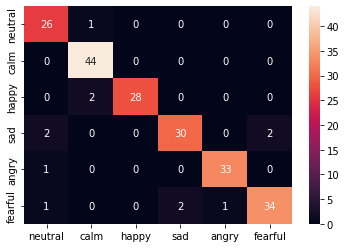

In [27]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','calm', 'happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [28]:
path='/content/drive/My Drive/fusion/fusion_model/SVM/linear/expert1'
savedvX = joblib.dump(model, path)

print("MODEL SAVED")

MODEL SAVED
